<h1> SIMPLE LINEAR REGRESSION </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
wh=pd.read_csv('C:/Users/Dell/Downloads/weight-height.csv')

In [3]:
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
wh.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
wh.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [34]:
wh.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367253,161.439778
std,3.845824,32.106533
min,55.002659,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,77.677224,264.196735


<AxesSubplot:xlabel='Gender', ylabel='count'>

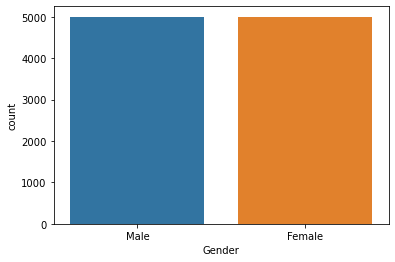

In [7]:
sns.countplot(x='Gender',data=wh)

{'whiskers': [<matplotlib.lines.Line2D at 0x2018ad6e430>,
 'caps': [<matplotlib.lines.Line2D at 0x2018ad6eac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018ad58fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2018ad79220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018ad795b0>],
 'means': []}

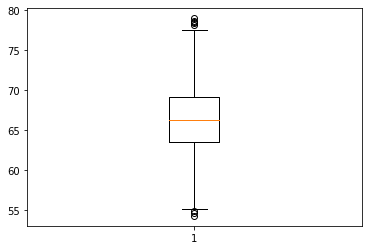

In [8]:
plt.boxplot(wh.Height)

In [9]:
q3 = wh.Height.quantile(0.75)
q1 = wh.Height.quantile(0.25)
iqr=q3-q1
print(iqr)

5.668641245615746


In [10]:
ue=q3+1.5*(iqr)
print(ue)
le=q1-1.5*(iqr)
print(le)

77.67722359525831
55.00265861279534


In [11]:
wh[(wh.Height<ue)&(wh.Height>le)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [12]:
wh.Height[wh.Height>ue]=ue
wh.Height[wh.Height<le]=le

C:\Users\Dell\AppData\Local\Temp/ipykernel_14200/3059984744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wh.Height[wh.Height>ue]=ue
C:\Users\Dell\AppData\Local\Temp/ipykernel_14200/3059984744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wh.Height[wh.Height<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x2018adf1340>,
 'caps': [<matplotlib.lines.Line2D at 0x2018adf1940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018ade1f70>],
 'medians': [<matplotlib.lines.Line2D at 0x2018adfd0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018adfd460>],
 'means': []}

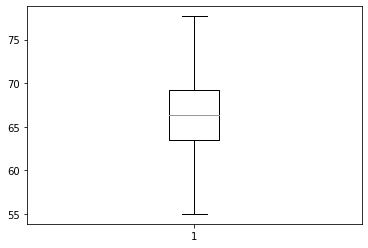

In [13]:
plt.boxplot(wh.Height)

{'whiskers': [<matplotlib.lines.Line2D at 0x2018ae5b790>,
 'caps': [<matplotlib.lines.Line2D at 0x2018ae5beb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018ae5b400>],
 'medians': [<matplotlib.lines.Line2D at 0x2018ae67610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018ae679a0>],
 'means': []}

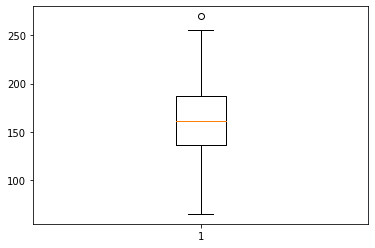

In [14]:
plt.boxplot(wh.Weight)

In [15]:
q3 = wh.Weight.quantile(0.75)
q1 = wh.Weight.quantile(0.25)
iqr=q3-q1
print(iqr)

51.35147356318197


In [16]:
ue=q3+1.5*(iqr)
print(ue)
le=q1-1.5*(iqr)
print(le)

264.19673521345646
58.79084096072856


In [17]:
wh[(wh.Weight<ue)&(wh.Weight>le)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [18]:
wh.Weight[wh.Weight>ue]=ue
wh.Weight[wh.Weight<le]=le

C:\Users\Dell\AppData\Local\Temp/ipykernel_14200/3271655245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wh.Weight[wh.Weight>ue]=ue
C:\Users\Dell\AppData\Local\Temp/ipykernel_14200/3271655245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wh.Weight[wh.Weight<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x2018aec61f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2018aec6910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018aeb7e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2018aed10a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018aed1430>],
 'means': []}

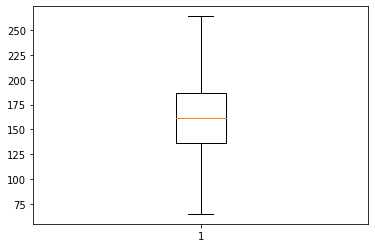

In [19]:
plt.boxplot(wh.Weight)


In [20]:
x = wh.iloc[:,1:2].values
y = wh.iloc[:, 2].values

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape

(8000, 1)

In [23]:
x_test.shape

(2000, 1)

In [24]:
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model.predict(x_test)

array([179.26368381, 180.35865689, 161.62484365, ..., 129.1906098 ,
       166.78892621, 101.78798171])

In [27]:
predicted_y = model.predict(x_test)

In [28]:
model.score(x_test,y_test)

0.8577226950251513

In [29]:
mean_squared_error(y_test,predicted_y)

149.01301685661298

<h2> training set </h2>

Text(0, 0.5, 'Weight')

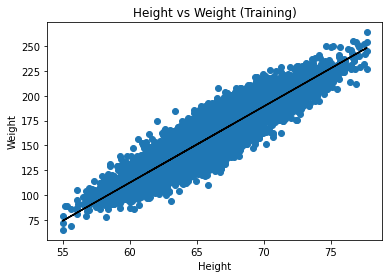

In [30]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color = 'black')
plt.title("Height vs Weight (Training)")
plt.xlabel("Height")
plt.ylabel("Weight")

<h2>test set </h2>

Text(0, 0.5, 'Weight')

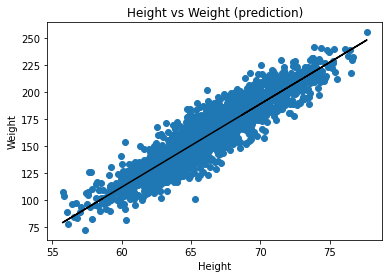

In [31]:
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), color = 'black')
plt.title("Height vs Weight (prediction)")
plt.xlabel("Height")
plt.ylabel("Weight")